In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from graph import Graph, Node

In [2]:
dic_nodes = {}
edge_names = []

tab_name_V = ["Sprinkler", "Rain", "My_grass", "His_grass"]
for name_V in tab_name_V:
    node_V = Node(name_V, "V", nb_states=2)
    dic_nodes[name_V] = node_V

# By convention, small letters represent small variable ie. < 0.3
a, b = 0, 0.1
c, d = 0.01, 0.01
e, f = 0.09, 0.01
g, h = 0.15, 0.2
a, b, c, d, e, f, g, h = np.random.rand(8)

dist_list = [
    [
        [1-a, b],
        [a, 1-b]
    ],
    [
        [1-c, d],
        [c, 1-d]
    ],
    [
        [1-e, f],
        [e, 1-f]
    ],
]

tab_dist_index = [
    ["My_grass", "Sprinkler"],
    ["My_grass", "Rain"],
    ["His_grass", "Rain"],
]

for dist, dist_index in zip(dist_list, tab_dist_index):
    dist = np.array(dist)
    first_letters = dist_index[1][0] + dist_index[0][0]
    name_F = f"F_{first_letters}"
    node_F = Node(name_F, "F", dist=dist, dist_index=dist_index)
    dic_nodes[name_F] = node_F
    edge_names.append((dist_index[1], name_F))
    edge_names.append((name_F, dist_index[0]))


# Priors on parents nodes
dist_list = [
    [g, 1-g],
    [1-h, h],
]

tab_dist_index = [
    ["Sprinkler"],
    ["Rain"],
]

for dist, dist_index in zip(dist_list, tab_dist_index):
    dist = np.array(dist)
    name_V = dist_index[0]
    name_F = f"F_{name_V[0]}"
    node_F = Node(name_F, "F", dist=dist, dist_index=dist_index)
    dic_nodes[name_F] = node_F
    edge_names.append((name_F, name_V))


graph = Graph(dic_nodes, edge_names)

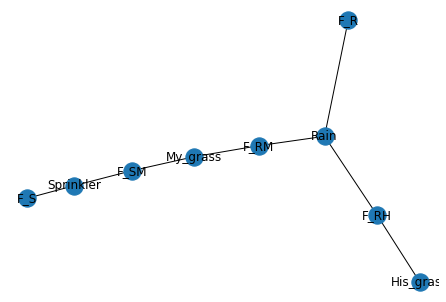

In [3]:
graph.plot()

In [4]:
def plot_proba(dic):
    return {key: [np.round(np.exp(log_proba),4) for log_proba in value][1] for key, value in dic.items()}

In [9]:
graph.edges[1].message = np.array([0,1])

In [10]:
[(edge, edge.message) for edge in graph.edges]

[((Sprinkler -> F_SM), array([0., 0.])),
 ((F_SM -> My_grass), array([0, 1])),
 ((Rain -> F_RM), array([0., 0.])),
 ((F_RM -> My_grass), array([0., 0.])),
 ((Rain -> F_RH), array([0., 0.])),
 ((F_RH -> His_grass), array([0., 0.])),
 ((F_S -> Sprinkler), array([0., 0.])),
 ((F_R -> Rain), array([0., 0.])),
 ((F_SM -> Sprinkler), array([0., 0.])),
 ((My_grass -> F_SM), array([0., 0.])),
 ((F_RM -> Rain), array([0., 0.])),
 ((My_grass -> F_RM), array([0., 0.])),
 ((F_RH -> Rain), array([0., 0.])),
 ((His_grass -> F_RH), array([0., 0.])),
 ((Sprinkler -> F_S), array([0., 0.])),
 ((Rain -> F_R), array([0., 0.]))]

In [11]:
graph.belief_propagation()
plot_proba(graph.compute_belief_nodes())

6 (F_S -> Sprinkler)
7 (F_R -> Rain)
13 (His_grass -> F_RH)


{'Sprinkler': 0.846, 'Rain': 0.2019, 'My_grass': 0.0001, 'His_grass': 0.2998}

In [8]:
[(edge, edge.message) for edge in graph.edges]

[((Sprinkler -> F_SM), array([0., 0.])),
 ((F_SM -> My_grass), array([-0.92044733, -3.95420772])),
 ((Rain -> F_RM), array([0., 0.])),
 ((F_RM -> My_grass), array([-5.28467525, -0.67295011])),
 ((Rain -> F_RH), array([0., 0.])),
 ((F_RH -> His_grass), array([-3.80922127, -0.35401717])),
 ((F_S -> Sprinkler), array([0., 0.])),
 ((F_R -> Rain), array([0., 0.])),
 ((F_SM -> Sprinkler), array([-1.41793314, -3.45672191])),
 ((My_grass -> F_SM), array([-5.28467525, -0.67295011])),
 ((F_RM -> Rain), array([-4.57035755, -1.38726781])),
 ((My_grass -> F_RM), array([-0.92044733, -3.95420772])),
 ((F_RH -> Rain), array([-1.76531152, -2.39792693])),
 ((His_grass -> F_RH), array([0., 0.])),
 ((Sprinkler -> F_S), array([-1.41793314, -3.45672191])),
 ((Rain -> F_R), array([-6.33566907, -3.78519474]))]